In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sample_data
import statsmodels.tsa.stattools as sts
from matplotlib import figure
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Multivariates Time Series

Modelling Casualty

In [ ]:
data = pd.read_csv('/content/stockmarketindex.csv', na_values=['null'], index_col='Date', parse_dates=True, infer_datetime_format=True)
data.head()

,asi,his,nky,sti,sensex
Date,,,,,
15-05-2009,4075.65,2019.66,136.57,1540.10,224.85
16-05-2009,3955.57,1994.27,141.07,1539.52,223.01
17-05-2009,3961.92,2002.47,141.65,1546.77,222.40
18-05-2009,3935.97,2000.80,143.67,1541.34,220.43
19-05-2009,3892.94,2001.04,140.71,1541.21,225.57


sti - singapore
sensex - india
nky- Tokyo

In [ ]:
data.tail()

,asi,his,nky,sti,sensex
Date,,,,,
25-07-2020,4543.94,3419.74,180.95,2411.67,495.76
26-07-2020,4590.77,3438.82,179.62,2432.56,497.42
27-07-2020,4614.39,3438.96,178.75,2430.66,500.75
28-07-2020,4646.53,3448.72,178.78,2444.96,500.13
31-07-2020,4593.26,3474.12,180.38,2451.13,503.38


In [ ]:
sts.adfuller(data.asi)

(-2.568738812806987,
 0.09963196476676572,
 1,
 2837,
 {'1%': -3.432657094354157,
  '10%': -2.5673126119599647,
  '5%': -2.862559315261322},
 31376.531892318148)

In [ ]:
sts.adfuller(data.his)

(-2.702804038313093,
 0.07355430358016592,
 0,
 2838,
 {'1%': -3.4326562806874334,
  '10%': -2.567312420641838,
  '5%': -2.8625589559080318},
 28795.21937969294)

In [ ]:
sts.adfuller(data.nky)
#Not stationary

(-1.200699489315211,
 0.6732947369284324,
 2,
 2836,
 {'1%': -3.432657908595214,
  '10%': -2.567312803413099,
  '5%': -2.8625596748681668},
 11345.276195531438)

In [ ]:
sts.adfuller(data.sensex)
#Not stationary

(-2.3274070757162004,
 0.16328092342022704,
 1,
 2837,
 {'1%': -3.432657094354157,
  '10%': -2.5673126119599647,
  '5%': -2.862559315261322},
 17808.954665700272)

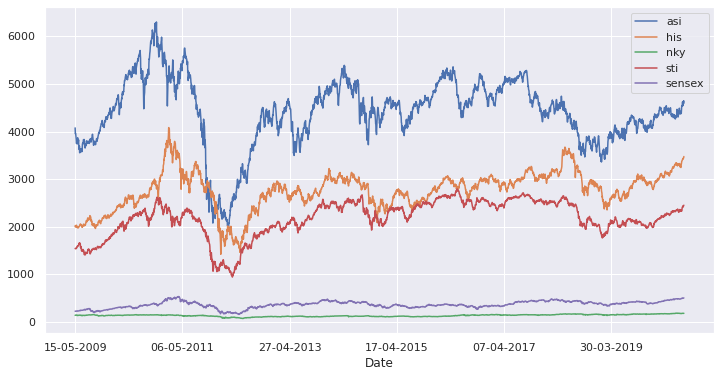

In [ ]:
data.plot(figsize=(12,6))

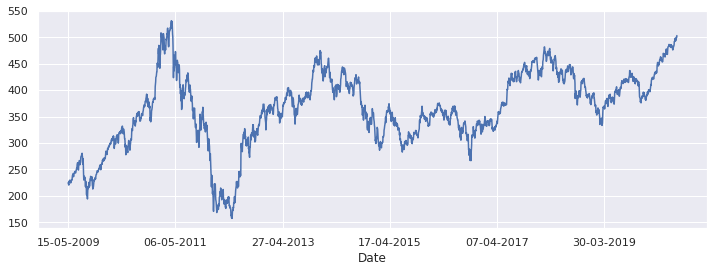

In [ ]:
data.sensex.plot(figsize=(12,4))

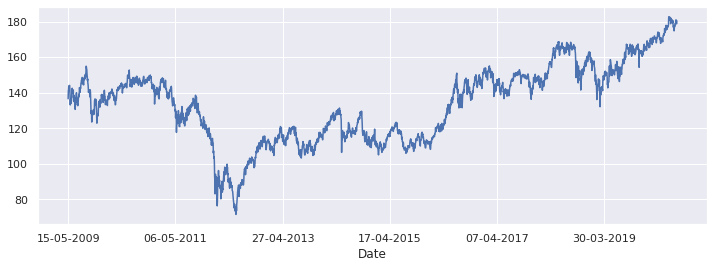

In [ ]:
data.nky.plot(figsize=(12,4))

Convert the data into stationary by taking first difference

In [ ]:
data_diff = data.diff().dropna()

In [ ]:
data_diff.head()

,asi,his,nky,sti,sensex
Date,,,,,
16-05-2009,-120.08,-25.39,4.50,-0.58,-1.84
17-05-2009,6.35,8.20,0.58,7.25,-0.61
18-05-2009,-25.95,-1.67,2.02,-5.43,-1.97
19-05-2009,-43.03,0.24,-2.96,-0.13,5.14
22-05-2009,-59.59,29.87,2.75,-1.55,2.48


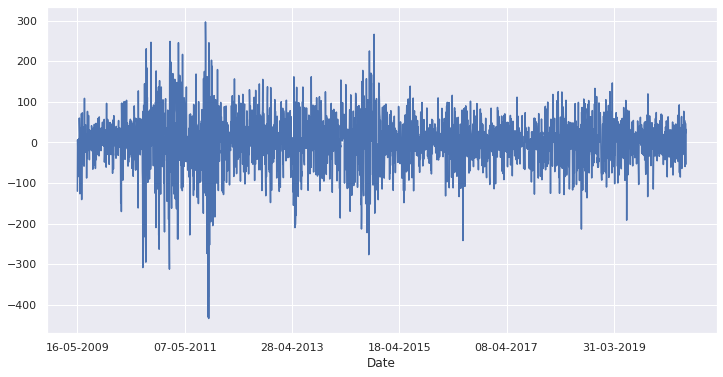

In [ ]:
data_diff.asi.plot(figsize=(12,6))
plt.show()

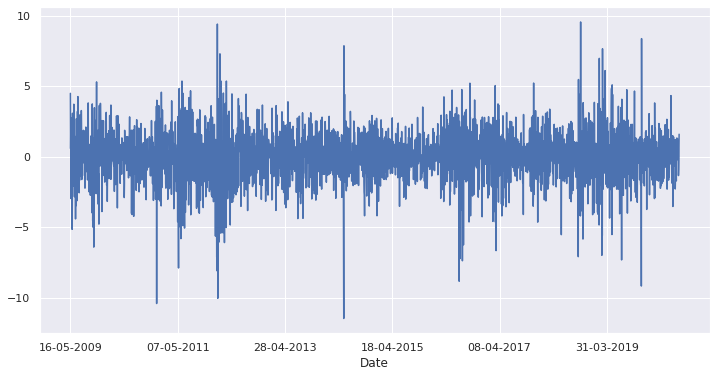

In [ ]:
data_diff.nky.plot(figsize=(12,6))
plt.show()

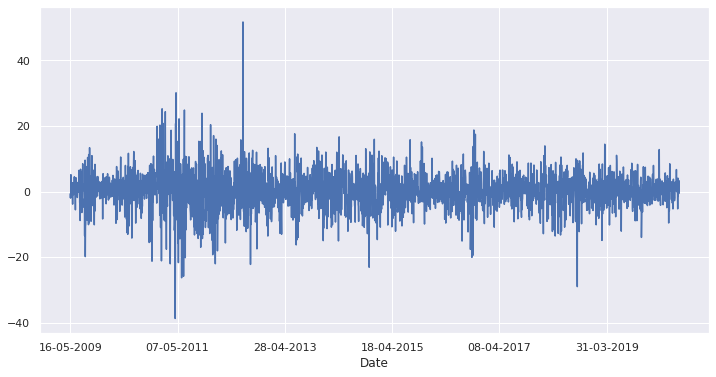

In [ ]:
data_diff.sensex.plot(figsize=(12,6))
plt.show()

Granger Casualty: 

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

Null Hypothesis (H0): ASI does not granger because ASI causes or impacts HIS. No Granger Causality

In [ ]:
grangercausalitytests(data_diff[['asi', 'his']], maxlag=15, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9517  , p=0.3294  , df_denom=2834, df_num=1
ssr based chi2 test:   chi2=0.9527  , p=0.3290  , df=1
likelihood ratio test: chi2=0.9525  , p=0.3291  , df=1
parameter F test:         F=0.9517  , p=0.3294  , df_denom=2834, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4981  , p=0.6077  , df_denom=2831, df_num=2
ssr based chi2 test:   chi2=0.9979  , p=0.6072  , df=2
likelihood ratio test: chi2=0.9978  , p=0.6072  , df=2
parameter F test:         F=0.4981  , p=0.6077  , df_denom=2831, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2567  , p=0.2876  , df_denom=2828, df_num=3
ssr based chi2 test:   chi2=3.7794  , p=0.2863  , df=3
likelihood ratio test: chi2=3.7769  , p=0.2866  , df=3
parameter F test:         F=1.2567  , p=0.2876  , df_denom=2828, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.9918  , p=0.

{1: ({'lrtest': (0.952507739290013, 0.32908179427097395, 1),
   'params_ftest': (0.9516602536742429, 0.3293803139749294, 2834.0, 1.0),
   'ssr_chi2test': (0.9526676569067017, 0.3290411965082914, 1),
   'ssr_ftest': (0.9516602536741604, 0.3293803139749294, 2834.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (0.9977665025071474, 0.6072083804179771, 2),
   'params_ftest': (0.49809131140599816, 0.6077426881559386, 2831.0, 2.0),
   'ssr_chi2test': (0.9979420410802664, 0.6071550885103655, 2),
   'ssr_ftest': (0.49809131140659985, 0.6077426881555565, 2831.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (3.7769038931000978, 0.2865840492321026, 3),
   'params_ftest': (1.2566963269497904, 0.28760153865546584, 2828.0, 3.0),
   'ssr_chi2test': (3.779420884266988, 0.2862889184285111, 3),
   'ssr_ftest': (1.2566963269496818, 0.2876015386555178, 2828.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 

In [ ]:
grangercausalitytests(data_diff[['his', 'asi']], maxlag=15, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8921  , p=0.0891  , df_denom=2834, df_num=1
ssr based chi2 test:   chi2=2.8952  , p=0.0888  , df=1
likelihood ratio test: chi2=2.8937  , p=0.0889  , df=1
parameter F test:         F=2.8921  , p=0.0891  , df_denom=2834, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.2738  , p=0.0380  , df_denom=2831, df_num=2
ssr based chi2 test:   chi2=6.5591  , p=0.0376  , df=2
likelihood ratio test: chi2=6.5516  , p=0.0378  , df=2
parameter F test:         F=3.2738  , p=0.0380  , df_denom=2831, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.1692  , p=0.0896  , df_denom=2828, df_num=3
ssr based chi2 test:   chi2=6.5237  , p=0.0887  , df=3
likelihood ratio test: chi2=6.5162  , p=0.0890  , df=3
parameter F test:         F=2.1692  , p=0.0896  , df_denom=2828, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.9243  , p=0.

{1: ({'lrtest': (2.893709167285124, 0.08892597918761709, 1),
   'params_ftest': (2.892123916634386, 0.08912321973616268, 2834.0, 1.0),
   'ssr_chi2test': (2.895185445127884, 0.08884455112214716, 1),
   'ssr_ftest': (2.8921239166346218, 0.0891232197361159, 2834.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (6.551571194060671, 0.03778717207568714, 2),
   'params_ftest': (3.2737902436670265, 0.038006038098312246, 2831.0, 2.0),
   'ssr_chi2test': (6.5591445644923585, 0.037644354523051995, 2),
   'ssr_ftest': (3.2737902436667605, 0.03800603809832167, 2831.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (6.516245213642833, 0.08902402988466462, 3),
   'params_ftest': (2.169210582470354, 0.08961106879602433, 2828.0, 3.0),
   'ssr_chi2test': (6.523739746786677, 0.0887309540639193, 3),
   'ssr_ftest': (2.169210582470632, 0.08961106879600714, 2828.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0.

In [ ]:
#Effect of nky to sensex
#JApanes market is impacting indian stock market after 6 lags (Null hypothesis is rejected on after 6th periods)
#If something is impacting JApanese market, its impact on Indian market would be visible after 6 lags period
grangercausalitytests(data_diff[['nky', 'sensex']], maxlag=15, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0015  , p=0.9691  , df_denom=2834, df_num=1
ssr based chi2 test:   chi2=0.0015  , p=0.9691  , df=1
likelihood ratio test: chi2=0.0015  , p=0.9691  , df=1
parameter F test:         F=0.0015  , p=0.9691  , df_denom=2834, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0311  , p=0.9693  , df_denom=2831, df_num=2
ssr based chi2 test:   chi2=0.0624  , p=0.9693  , df=2
likelihood ratio test: chi2=0.0624  , p=0.9693  , df=2
parameter F test:         F=0.0311  , p=0.9693  , df_denom=2831, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1012  , p=0.3473  , df_denom=2828, df_num=3
ssr based chi2 test:   chi2=3.3117  , p=0.3460  , df=3
likelihood ratio test: chi2=3.3097  , p=0.3463  , df=3
parameter F test:         F=1.1012  , p=0.3473  , df_denom=2828, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.8574  , p=0.

{1: ({'lrtest': (0.0015022380193840945, 0.9690827604224087, 1),
   'params_ftest': (0.0015006498672007515, 0.9691018277908823, 2834.0, 1.0),
   'ssr_chi2test': (0.0015022384153444881, 0.9690827563498607, 1),
   'ssr_ftest': (0.0015006498657336197, 0.9691018278070701, 2834.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (0.06238888130610576, 0.9692870859378532, 2),
   'params_ftest': (0.031139785921484267, 0.9693403955286357, 2831.0, 2.0),
   'ssr_chi2test': (0.06238956755470889, 0.9692867533519559, 2),
   'ssr_ftest': (0.03113978592161158, 0.9693403955286357, 2831.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (3.3097353602533985, 0.346289960703124, 3),
   'params_ftest': (1.1011637126157612, 0.3473439676003393, 2828.0, 3.0),
   'ssr_chi2test': (3.311668096109916, 0.3460219618986376, 3),
   'ssr_ftest': (1.101163712615972, 0.3473439676001262, 2828.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
   

In [ ]:
grangercausalitytests(data_diff[['sensex', 'nky']], maxlag=15, addconst=True, verbose=True)
#The impact is observed that 13 days lag
#sensex cannot be exogenous to nky but nky is exogenous to sensex


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1709  , p=0.6794  , df_denom=2834, df_num=1
ssr based chi2 test:   chi2=0.1711  , p=0.6792  , df=1
likelihood ratio test: chi2=0.1710  , p=0.6792  , df=1
parameter F test:         F=0.1709  , p=0.6794  , df_denom=2834, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7281  , p=0.4829  , df_denom=2831, df_num=2
ssr based chi2 test:   chi2=1.4588  , p=0.4822  , df=2
likelihood ratio test: chi2=1.4584  , p=0.4823  , df=2
parameter F test:         F=0.7281  , p=0.4829  , df_denom=2831, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4981  , p=0.6836  , df_denom=2828, df_num=3
ssr based chi2 test:   chi2=1.4980  , p=0.6827  , df=3
likelihood ratio test: chi2=1.4976  , p=0.6828  , df=3
parameter F test:         F=0.4981  , p=0.6836  , df_denom=2828, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4038  , p=0.

{1: ({'lrtest': (0.17104870695766294, 0.6791814655387212, 1),
   'params_ftest': (0.17087298173227178, 0.6793683990015051, 2834.0, 1.0),
   'ssr_chi2test': (0.17105386350564966, 0.6791768992576123, 1),
   'ssr_ftest': (0.1708729817324678, 0.6793683990015051, 2834.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (1.4584112045522488, 0.4822919695939277, 2),
   'params_ftest': (0.728107177140992, 0.48291241418658915, 2831.0, 2.0),
   'ssr_chi2test': (1.4587862623600771, 0.48220153438937574, 2),
   'ssr_ftest': (0.7281071771405815, 0.4829124141867409, 2831.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (1.4975999377347762, 0.6828243741550597, 3),
   'params_ftest': (0.4980989364845063, 0.6836174130055037, 2828.0, 3.0),
   'ssr_chi2test': (1.4979955639327722, 0.6827330303611792, 3),
   'ssr_ftest': (0.4980989364846419, 0.6836174130053585, 2828.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0.

Unidirectional Causality: X is impacted by Y but Y is not impacted by X.
Bi-directional Causality: X is impacted by Y and Y is also impacted by X.

In [ ]:
grangercausalitytests(data_diff[['sensex', 'sti']], maxlag=15, addconst=True, verbose=True)
#No causal impact of sensex on sti for all the 15 lags


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2316  , p=0.6304  , df_denom=2834, df_num=1
ssr based chi2 test:   chi2=0.2318  , p=0.6302  , df=1
likelihood ratio test: chi2=0.2318  , p=0.6302  , df=1
parameter F test:         F=0.2316  , p=0.6304  , df_denom=2834, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9166  , p=0.4000  , df_denom=2831, df_num=2
ssr based chi2 test:   chi2=1.8364  , p=0.3992  , df=2
likelihood ratio test: chi2=1.8358  , p=0.3994  , df=2
parameter F test:         F=0.9166  , p=0.4000  , df_denom=2831, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6285  , p=0.5966  , df_denom=2828, df_num=3
ssr based chi2 test:   chi2=1.8901  , p=0.5955  , df=3
likelihood ratio test: chi2=1.8894  , p=0.5957  , df=3
parameter F test:         F=0.6285  , p=0.5966  , df_denom=2828, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.2833  , p=0.

{1: ({'lrtest': (0.2318257884871855, 0.6301733261725089, 1),
   'params_ftest': (0.2315901052107472, 0.6303844408778863, 2834.0, 1.0),
   'ssr_chi2test': (0.23183526058109305, 0.6301663369415296, 1),
   'ssr_ftest': (0.23159010521213175, 0.6303844408767247, 2834.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (1.8357935475323757, 0.39935809884123774, 2),
   'params_ftest': (0.9165751047595503, 0.4000049011661275, 2831.0, 2.0),
   'ssr_chi2test': (1.8363878467665466, 0.39923944736458056, 2),
   'ssr_ftest': (0.916575104759537, 0.40000490116619025, 2831.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (1.8894204809512303, 0.5956719445630199, 3),
   'params_ftest': (0.6284611479520482, 0.5965960230471787, 2828.0, 3.0),
   'ssr_chi2test': (1.8900502345596035, 0.5955376895827016, 3),
   'ssr_ftest': (0.6284611479523291, 0.5965960230469776, 2828.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0.

In [ ]:
grangercausalitytests(data_diff[['asi', 'his']], maxlag=15, addconst=True, verbose=True)